<a href="https://colab.research.google.com/github/itzchav/TensorFlow-Probabilidad-Condicional/blob/main/Clasificador_de_habitaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Librerias a utilizar.**

In [ ]:
import matplotlib.pyplot as plt
import os
import re
import pandas as pd
import numpy as np
import shutil
import string
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras.layers import TextVectorization

**Abriendo drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Contenido del modelo**

In [ ]:
os.listdir("/content/drive/MyDrive/Modelo/Archivos_full")

['bedroom', 'kitchen', 'bathroom']

In [ ]:
os.listdir("/content/drive/MyDrive/Modelo/Archivos_full/bathroom")

['alma_bathroom1.txt',
 'anto_bathroom1.txt',
 'anto_bathroom2.txt',
 'pare_bathroom1.txt',
 'pare_bathroom2.txt',
 'rx2_bathroom1.txt',
 'sarmis_bathroom2_1_s5.txt',
 'sarmis_bathroom2_2_s5.txt',
 'sarmis_bathroom1_1_s6.txt',
 'sarmis_bathroom1_2_s6.txt',
 'sarmis_bathroom2_1_s6.txt',
 'sarmis_bathroom2_2_s6.txt']

**Abriendo la carpeta de entrenamiento**

**Ejemplo de archivo txt de baño**

In [ ]:
archivo_ejemplo = os.path.join('/content/drive/MyDrive/Modelo/Archivos_full/bathroom', 'alma_bathroom1.txt')
with open(archivo_ejemplo) as archivo:
  #print(archivo.read())
  print('ok')

ok


In [ ]:

# Ruta del archivo
archivo_ejemplo = os.path.join('/content/drive/MyDrive/Modelo/Archivos_full/bathroom', 'alma_bathroom1.txt')

# Leer el archivo y cargar su contenido
with open(archivo_ejemplo, 'r') as archivo:
    lineas = archivo.readlines()

# Ver las primeras líneas del archivo
print(lineas[:5])  # Muestra las primeras 5 líneas para inspección

['window towel paper_roll toilet toilet_brush plant towel bath wall wall floor              \n', 'towel bath faucet bottle bottle bottle wall wall                 \n', 'faucet teddy_pumba tooth_brush_holder sink mirror window towel wall floor                \n', 'window towel paper_roll toilet toilet_brush plant towel bath wall wall floor              \n', 'towel bath faucet bottle bottle bottle wall wall wall                \n']


**Eligiendo los archivos de entrenamiento **

1.   80% Entrenamiento
2.   20% Validación



In [ ]:
import pandas as pd
# Convertir el contenido del archivo en un DataFrame con una columna 'Texto'
df = pd.DataFrame(lineas, columns=['Texto'])

# Mostrar las primeras filas del DataFrame
print(df.head())


                                               Texto
0  window towel paper_roll toilet toilet_brush pl...
1  towel bath faucet bottle bottle bottle wall wa...
2  faucet teddy_pumba tooth_brush_holder sink mir...
3  window towel paper_roll toilet toilet_brush pl...
4  towel bath faucet bottle bottle bottle wall wa...


In [ ]:


# Ruta del directorio
directorio = '/content/drive/MyDrive/Modelo/Archivos_2'

# Rutas de las carpetas
directorio_kitchen = '/content/drive/MyDrive/Modelo/Archivos_2/kitchen'
directorio_bathroom = '/content/drive/MyDrive/Modelo/Archivos_2/bathroom'
directorio_bedroom = '/content/drive/MyDrive/Modelo/Archivos_2/bedroom'  # Nueva carpeta para bedroom

# Listas para almacenar las líneas de texto y sus etiquetas
texts = []
labels = []

# Función para leer los archivos de una carpeta y etiquetarlos
def leer_archivos(directorio, etiqueta):
    for filename in os.listdir(directorio):
        file_path = os.path.join(directorio, filename)
        if file_path.endswith('.txt'):  # Solo leer archivos .txt
            with open(file_path, 'r', encoding='utf-8') as file:
                lines = file.readlines()  # Leer todas las líneas del archivo
                for line in lines:
                    texts.append(line.strip())  # Añadir la línea al texto (eliminando saltos de línea)
                    labels.append(etiqueta)  # Añadir la etiqueta (kitchen, bathroom o bedroom)

# Leer archivos de las tres carpetas
leer_archivos(directorio_kitchen, 'kitchen')
leer_archivos(directorio_bathroom, 'bathroom')
leer_archivos(directorio_bedroom, 'bedroom')  # Leer archivos de bedroom

# Crear un DataFrame con las líneas y las etiquetas
df = pd.DataFrame({'Texto': texts, 'Etiqueta': labels})

# Ver las primeras filas del DataFrame
print(df.head())

# Ver el tamaño del DataFrame
print(f"El tamaño del DataFrame es: {df.shape}")



                                               Texto Etiqueta
0  refrigerator microwave upper_cabinet upper_cab...  kitchen
1  upper_cabinet bottle bowl window picture sink ...  kitchen
2                                       wall_cabinet  kitchen
3  wall_cabinet refrigerator microwave upper_cabi...  kitchen
4  refrigerator microwave upper_cabinet upper_cab...  kitchen
El tamaño del DataFrame es: (465, 2)


**Declaración de etiquetas**

In [ ]:
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf


# ----------------------
# Paso 1: Vectorización del texto usando TextVectorization
# ----------------------

# Crear un objeto TextVectorization para vectorizar el texto
vectorize_layer = tf.keras.layers.TextVectorization(output_mode='int', output_sequence_length=10)

# Adaptar el vectorizador al texto del DataFrame
vectorize_layer.adapt(df['Texto'].values)

# Vectorizar el texto
vector = vectorize_layer(df['Texto'].values)



In [ ]:
# ----------------------
# Paso 2: Label Encoding para las etiquetas
# ----------------------

# Crear el codificador LabelEncoder
label_encoder = LabelEncoder()

# Aplicar el LabelEncoder en la columna 'Etiqueta'
etiquetas = label_encoder.fit_transform(df['Etiqueta'])
etiquetas = tf.keras.utils.to_categorical(etiquetas, num_classes=3)  # 3 clases: 0, 1, 2


# **Dividir dataset**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(vector.numpy(), etiquetas, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)



In [ ]:
# Crear el modelo
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=128, input_length=100),  # Embedding layer

    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 clases
])

In [ ]:

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

# Entrenamiento
history = model.fit(
    X_train,  # Entrenamiento (vectorizado)
    y_train,  # Etiquetas de entrenamiento
    validation_data=(X_valid, y_valid),  # Datos de validación
    epochs=100,  # Número de épocas para entrenar
    batch_size=32  # Tamaño del batch (opcional, puedes ajustarlo)
)


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 210ms/step - categorical_accuracy: 0.4442 - loss: 1.0875 - val_categorical_accuracy: 0.7312 - val_loss: 1.0391
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - categorical_accuracy: 0.7150 - loss: 1.0221 - val_categorical_accuracy: 0.6882 - val_loss: 0.9659
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - categorical_accuracy: 0.7415 - loss: 0.9432 - val_categorical_accuracy: 0.6882 - val_loss: 0.8710
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - categorical_accuracy: 0.7037 - loss: 0.8523 - val_categorical_accuracy: 0.7097 - val_loss: 0.7672
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - categorical_accuracy: 0.7520 - loss: 0.7337 - val_categorical_accuracy: 0.7957 - val_loss: 0.6557
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - categorical_accuracy: 0.7847 - loss: 0.6428 - val_categorical_accuracy: 0.8495 - val_loss: 0.5487
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - categorical_accuracy: 0.8072 - los

**Rendimiento**

**Evaluando el modelo**

In [ ]:
perdida, precision = model.evaluate(X_test,y_test)

print("PERDIDA: ", perdida)
print("PRESICIÓN: ", precision)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - categorical_accuracy: 0.9605 - loss: 0.0674
PERDIDA:  0.08273681998252869
PRESICIÓN:  0.9599999785423279


# **Creando una gráfica en el tiempo**

In [ ]:
historial_dict = history.history
historial_dict.keys()

dict_keys(['categorical_accuracy', 'loss', 'val_categorical_accuracy', 'val_loss'])

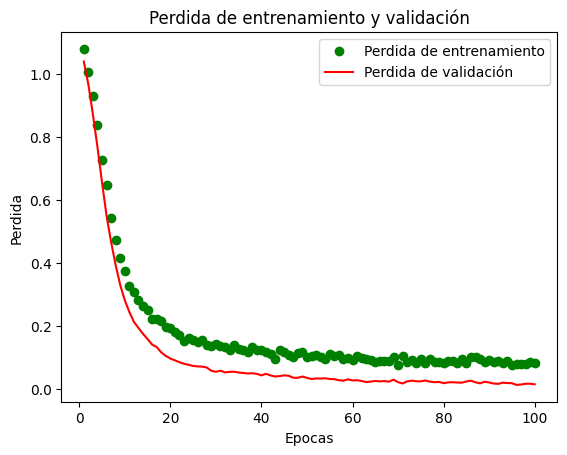

In [ ]:
acc = historial_dict['categorical_accuracy']
val_acc = historial_dict['val_categorical_accuracy']
perdida = historial_dict['loss']
val_perdida = historial_dict['val_loss']

epocas = range(1, len(acc) + 1)

plt.plot(epocas, perdida, 'go', label='Perdida de entrenamiento')

plt.plot(epocas, val_perdida, 'r', label='Perdida de validación')
plt.title('Perdida de entrenamiento y validación')
plt.xlabel('Epocas')
plt.ylabel('Perdida')
plt.legend()

plt.show()

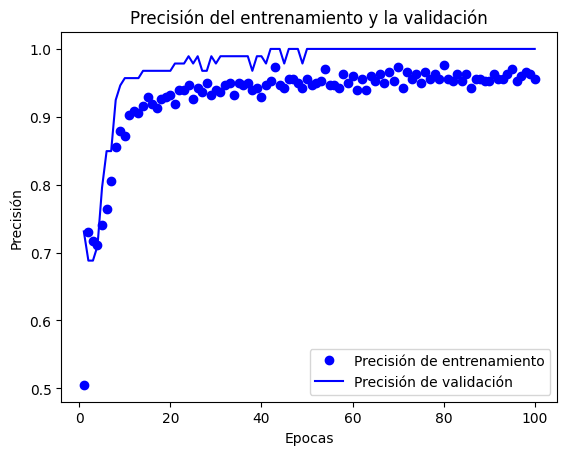

In [ ]:
plt.plot(epocas, acc, 'bo', label='Precisión de entrenamiento')
plt.plot(epocas, val_acc, 'b', label='Precisión de validación')
plt.title('Precisión del entrenamiento y la validación')
plt.xlabel('Epocas')
plt.ylabel('Precisión')
plt.legend(loc='lower right')

plt.show()

In [ ]:
entrada_texto = ["door mirror shelf bottle bottle faucet bottle sink counter stool picture picture wall wall cabinet floor"]
entrada_texto = ["refrigerator doorframe  "]
entrada_texto = ["bed wall clutt clothes_box ceiling "]
entrada_texto = ["wall wall door doorframe refrigerator"]
entrada_vectorizada = vectorize_layer(entrada_texto)
prediccion = model.predict(entrada_vectorizada)
prediccion

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


array([[4.9962901e-04, 2.6805636e-05, 9.9947363e-01]], dtype=float32)

In [ ]:
prediccion_clase = np.argmax(prediccion)
# Mapear el índice numérico de vuelta a la etiqueta original
etiquetas_originales = label_encoder.classes_  # Esto te da el mapeo de las clases codificadas
etiqueta_predicha = etiquetas_originales[prediccion_clase]

print(f"La clase predicha es: {etiqueta_predicha}")


La clase predicha es: kitchen
